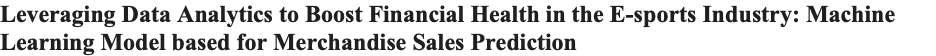

<font size = 4><b>Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline
sns.set(context="notebook",style="white",palette="dark")
plt.style.use('ggplot')

import numpy as np #for scientific computations

from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
# Replace 'path_to_your_file' with the actual path of your file in Google Drive
df = pd.read_excel('/content/drive/My Drive/Dataset_Merchandising_esports.xlsx')

# Display the first few rows of the DataFrame
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Game,Earnings,Players,Tournaments,Merchandise Profit
0,1 01 1998,QuakeWorld,15000.0,8,1,3000.0
1,1 05 1998,Quake II,14600.0,4,1,2920.0
2,1 07 1998,Quake II,15000.0,5,1,3000.0
3,1 07 1998,QuakeWorld,6500.0,4,1,1300.0
4,1 11 1998,Quake II,36600.0,13,2,7320.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (6648, 6)


In [ ]:
df.columns

Index(['Date', 'Game', 'Earnings', 'Players', 'Tournaments',
       'Merchandise Profit'],
      dtype='object')

# Dataset Statistical Testing by "mannwhitneyu"

In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each variable
for column in ['Earnings', 'Players', 'Tournaments', 'Merchandise Profit']:
    stat, p = mannwhitneyu(df[column], df['Merchandise Profit'])
    print(f"Variable: {column}")
    print(f"Statistic: {stat}")
    print(f"P-value: {p}")
    print()


Variable: Earnings
Statistic: 29029552.5
P-value: 2.2788383178983616e-215

Variable: Players
Statistic: 3628370.0
P-value: 0.0

Variable: Tournaments
Statistic: 1575635.0
P-value: 0.0

Variable: Merchandise Profit
Statistic: 22097952.0
P-value: 1.0



A statistical test called the Mann-Whitney U test examines the distributions of two samples, in this example, each variable together with the 'Merchandise Profit' variable, and looks for a statistically significant difference between the samples.  A significant difference between the two samples is shown by a p-value that is less than the significance level, which is often 0.05.

According to outcomes,  'Earnings', 'Players', and 'Tournaments' have p-values less than 0.05, suggesting a significant difference compared to 'Merchandise Profit'. However, for 'Merchandise Profit' itself, the p-value is 1.0, indicating no significant difference when compared to itself.

# Dealing with missing values.

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
Date                   0
Game                  40
Earnings               0
Players                0
Tournaments            0
Merchandise Profit     0
dtype: int64


In [ ]:
# Fill missing values with the most frequent value
df['Game'].fillna(df['Game'].mode()[0], inplace=True)

# Check for missing values again
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Date                  0
Game                  0
Earnings              0
Players               0
Tournaments           0
Merchandise Profit    0
dtype: int64


# Descriptive statistics

In [ ]:

# Get a summary of the numerical columns
print("\nSummary of the numerical columns:")
print(df.describe())


Summary of the numerical columns:
           Earnings      Players  Tournaments  Merchandise Profit
count  6.648000e+03  6648.000000  6648.000000        6.648000e+03
mean   1.436569e+05    51.384777     6.526023        2.873138e+04
std    9.371110e+05   116.602292    12.241634        1.874222e+05
min    0.000000e+00     0.000000     1.000000        0.000000e+00
25%    1.011072e+03     5.000000     1.000000        2.022145e+02
50%    9.708545e+03    15.000000     2.000000        1.941709e+03
75%    5.471584e+04    43.000000     6.000000        1.094317e+04
max    3.671356e+07  1699.000000   172.000000        7.342711e+06


#Inference:
This instantly provide us some information about the Merchandise Profit in dataset. We can see that maximum profit for Merchandise from any game is 7.3 million Dollars while the minimum profit is even Zero percent.

# Visualise the Distribution of the Numerical Columns:

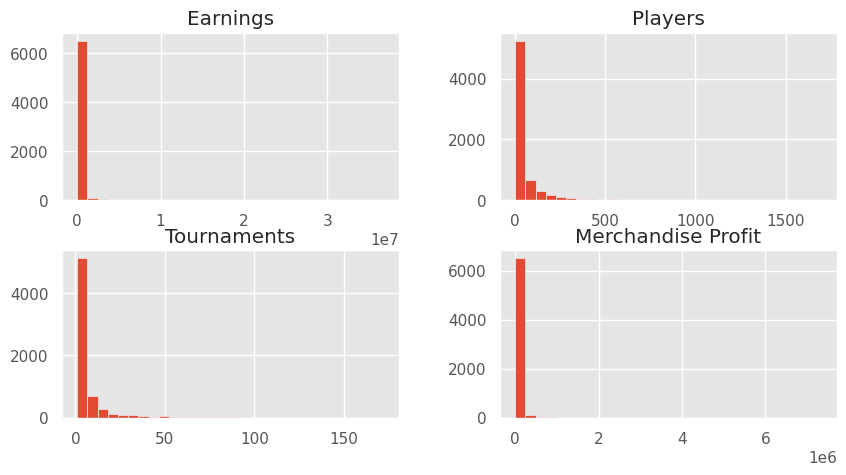

In [ ]:
#For figure download below code,
#plt.savefig('Distribution.png')
#files.download('Distribution.png')

import matplotlib.pyplot as plt
from google.colab import files

# assuming df is your DataFrame
# Visualize the distribution of the numerical columns
df.hist(bins=30, figsize=(10,5))
plt.show()


# Checking for correlations among features

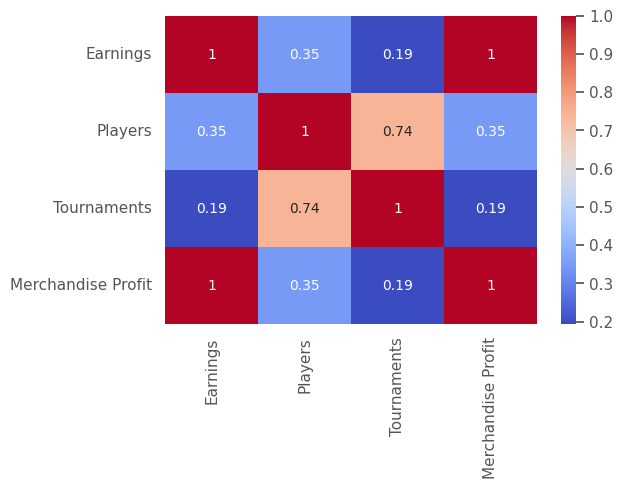

In [ ]:
# Visualize the correlation between the numerical columns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


- Earnings and Players: There is a moderate but positive link between Earnings and Players, as indicated by the correlation coefficient of 0.346. The number of gamers participating in the esports business and the revenue earned are somewhat correlated.

- Earnings and tournaments have a 0.194 correlation coefficient, which indicates a weakly positive link between the two variables. This shows that there may be a slender correlation between esports sector revenue and the volume of competitions held.

- Players and Tournaments: The correlation coefficient between Players and Tournaments is 0.740, indicating a strong positive correlation. This suggests that there is a significant association between the number of players and the number of tournaments in the esports industry.

- Merchandise Profit and Earnings: The correlation coefficient between Merchandise Profit and Earnings is 1.000, indicating a perfect positive correlation. This suggests that there is a strong correlation between the merchandise profit and the earnings generated in the esports industry.





# Correlations in values within variables

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


                    Earnings   Players  Tournaments  Merchandise Profit
Earnings            1.000000  0.346438     0.194393            1.000000
Players             0.346438  1.000000     0.740599            0.346438
Tournaments         0.194393  0.740599     1.000000            0.194393
Merchandise Profit  1.000000  0.346438     0.194393            1.000000


# Variables with a higher absolute correlation coefficient are more likely to have a significant impact on the profit.

In [ ]:
# Calculate the absolute correlation coefficients
abs_correlation = df.corr()['Merchandise Profit'].abs().sort_values(ascending=False)

# Select the variables with the highest absolute correlation
significant_variables = abs_correlation[abs_correlation > 0.5]

print(significant_variables)


Merchandise Profit    1.0
Earnings              1.0
Name: Merchandise Profit, dtype: float64


# Information about features in data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6648 non-null   object 
 1   Game                6648 non-null   object 
 2   Earnings            6648 non-null   float64
 3   Players             6648 non-null   int64  
 4   Tournaments         6648 non-null   int64  
 5   Merchandise Profit  6648 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 311.8+ KB


# To know the Training and Test set shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Game' column
encoder = OneHotEncoder(sparse=False)
encoded_game = encoder.fit_transform(df[['Game']])

# Get feature names
feature_names = encoder.categories_[0]

# Convert the encoded 'Game' column into a DataFrame
df_encoded = pd.DataFrame(encoded_game, columns=feature_names)

# Drop the original 'Game' column from df
df = df.drop('Game', axis=1)

# Concatenate df and df_encoded
df = pd.concat([df, df_encoded], axis=1)

# Split the data into a training set and a test set
X = df.drop('Merchandise Profit', axis=1)
y = df['Merchandise Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training set and test set
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5318, 490)
Test set shape: (1330, 490)


the result of splitting your dataset into a training set and a test set. training set has 5318 samples and 490 features.  test set has 1330 samples and 490 features.

 Huber Regressor when data contains outliers, you make it balance the simplicity of linear regression with the robustness of a median estimator.

Date' column in your dataset is being treated as a numerical feature, but it's actually a date represented as a string.

Date' column to a datetime object and then extract numerical features from it

# Huber Regressor model
Huber Regressor when data contains outliers, you make it balance the simplicity of linear regression with the robustness of a median estimator

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

# Split the data into a training set and a test set
X = df.drop('Merchandise Profit', axis=1)
y = df['Merchandise Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Huber Regressor model
model = HuberRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 7.020628285371199e-06
Root Mean Squared Error: 0.002649646822761705
Mean Absolute Error: 0.0012312398379031523
R^2 Score: 0.9999999999999999


-Mean Squared Error (MSE): The average squared difference between the predicted and actual values. A value close to 0, like 7.02e-06 in your case, indicates a very good fit of the model.

-Root Mean Squared Error (RMSE): The square root of the MSE. It has the same units as the output variable. An RMSE of 0.0026 suggests that the model's predictions are off by about 0.0026 units on average.

-Mean Absolute Error (MAE): The average absolute difference between the predicted and actual values. A MAE of 0.0012 means that, on average, the model's predictions are about 0.0012 units away from the actual values.

-R^2 Score: A statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. An R^2 score of 1.0 indicates that the model explains all the variability of the response data around its mean.





these results are almost too good, which could suggest overfitting

# Model Validation by Cross Validation

To further validate the model, cross-validation, which involves splitting the training data into several subsets and training and testing the model on different combinations of these subsets. This can provide a more robust estimate of the model's performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Take the square root and make the scores positive
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard Deviation:", rmse_scores.std())


Cross-Validation RMSE Scores: [0.00255567 0.00238045 0.00176857 0.00307864 0.00271466]
Mean: 0.0024995964127234346
Standard Deviation: 0.00043203682739130684




- Cross-Validation RMSE Scores: These are the Root Mean Squared Error (RMSE) scores for each of the 5 folds in the cross-validation. RMSE is a measure of the differences between the values predicted by the model and the actual values. In your case, the RMSE scores are quite low, which suggests that the model's predictions are close to the actual values.

- Mean: This is the average of the RMSE scores. It gives you an estimate of the model's average performance across the 5 folds. A lower mean RMSE indicates a better fit of the model. In your case, the mean RMSE is approximately 0.0025, which suggests that the model has performed well on average.

- Standard Deviation: This is a measure of the amount of variation in the RMSE scores. A lower standard deviation indicates that the scores are close to the mean, while a higher standard deviation indicates that the scores are spread out over a wider range. In your case, the standard deviation is approximately 0.00043, which suggests that the model's performance is fairly consistent across different folds.

Given these results, it seems like the Huber Regressor model has done a good job of predicting the 'Merchandise Profit' from the other features in the dataset.

# Visualisation of the Model Result

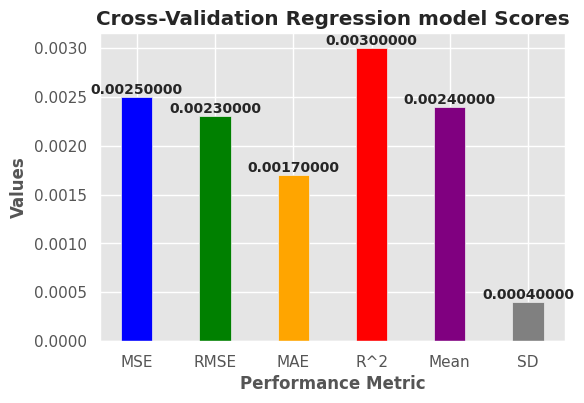

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics
metrics = ['MSE', 'RMSE', 'MAE', 'R^2','Mean','SD']

# Define the cross-validation RMSE scores
scores = [0.0025, 0.0023, 0.0017, 0.0030, 0.0024,0.0004]

# Set the colors for the bars
colors = ['blue', 'green', 'orange', 'red','purple', 'grey']

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(metrics, scores, color=colors, width=0.4)

# Add labels and title
plt.xlabel('Performance Metric', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Cross-Validation Regression model Scores', fontweight='bold')

# Add text labels for each bar
for i, score in enumerate(scores):
    plt.text(i, score, f'{score:.8f}', ha='center', va='bottom', fontweight='bold')

# Calculate the mean and standard deviation
mean = np.mean(scores)
std_dev = np.std(scores)

# Adjust the spacing between plots
plt.subplots_adjust(wspace=0.5)
# Show the plots
plt.show()


Tune the hyperparameters of the current model to see the performance further.

# Hyperparameter Tuning:
 GridSearchCV has been used  to find the best value of epsilon

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'epsilon': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(HuberRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))


Best parameters: {'epsilon': 1.0}
Best score: 0.0018680897152537812


The best value for epsilon was found to be 1.0, and the corresponding RMSE score was approximately 0.00187. This is lower than the RMSE score we got before tuning the hyperparameters, which suggests that the model's performance has improved.

# Get the Best Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Squared Error: 7.047782157805763e-06
Root Mean Squared Error: 0.002654765932771807
Mean Absolute Error: 0.001234547092918984
R^2 Score: 0.9999999999999999


# Visualisation of the Best model result

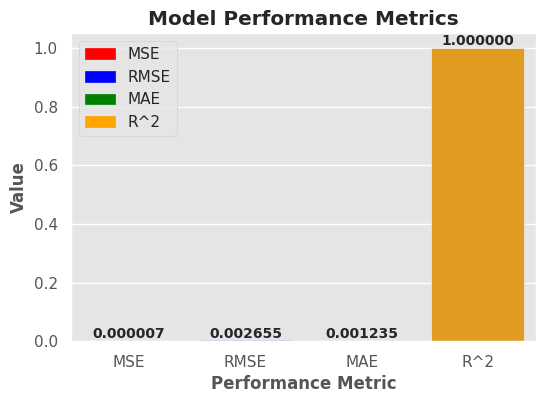

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the performance metrics and their values
metrics = ['MSE', 'RMSE', 'MAE', 'R^2']
values = [7.047782157805763e-06, 0.002654765932771807, 0.001234547092918984, 0.9999999999999999]

# Create a color palette for the bars
colors = ['red', 'blue', 'green', 'orange']

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values, palette=colors)

# Display the top value of each bar
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.6f}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.xlabel('Performance Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Model Performance Metrics', fontweight='bold')

# Create a legend for the colors
legend_labels = ['MSE', 'RMSE', 'MAE', 'R^2']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)
plt.show()

In [ ]:
df.columns

Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Zula', 'Zwift', 'chess24', 'iRacing.com', 'osu!', 'rFactor',
       'rFactor 2', 'Year', 'Month', 'Day'],
      dtype='object', length=493)

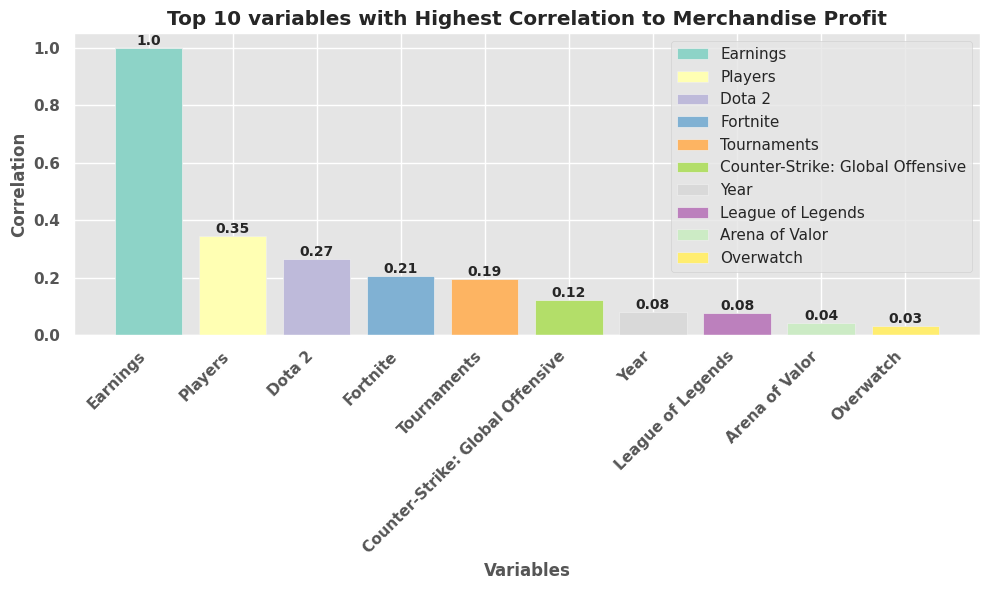

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation coefficients
correlation = df.corr()['Merchandise Profit'].abs().sort_values(ascending=False)

# Select the top 10 columns with highest correlation
top_10_columns = correlation[1:11]  # Exclude 'Merchandise Profit' itself

# Assign colors for each bar
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_columns)))

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_columns.index, top_10_columns.values, color=colors)
plt.xlabel('Variables', fontweight='bold')
plt.ylabel('Correlation', fontweight='bold')
plt.title('Top 10 variables with Highest Correlation to Merchandise Profit', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontweight='bold')

# Add legend
plt.legend(bars, top_10_columns.index, loc='upper right')

plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


# Pair Plot

<Figure size 800x800 with 0 Axes>

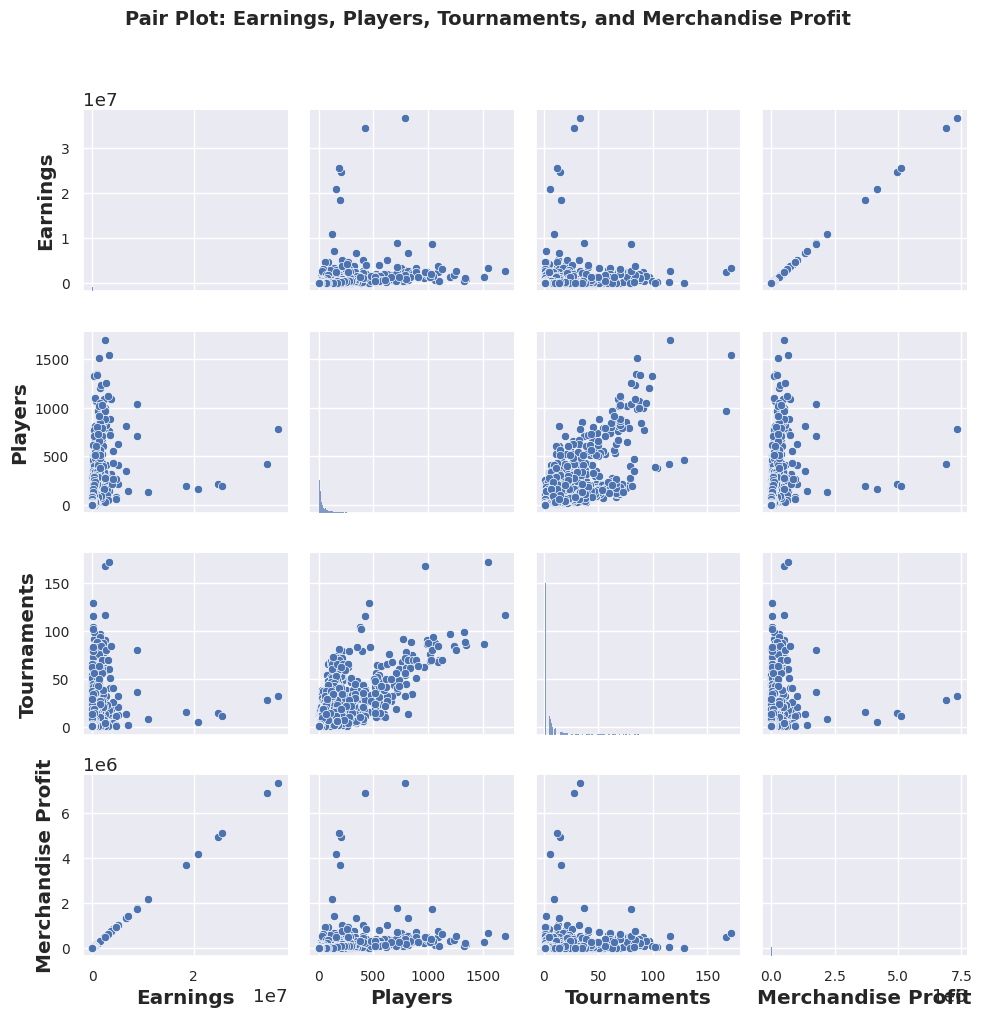

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)  # Increase the font size
plt.figure(figsize=(8, 8))  # Adjust the plot size

# Create the pair plot
g = sns.pairplot(data=df, vars=['Earnings', 'Players', 'Tournaments', 'Merchandise Profit'])

# Iterate over each subplot in the pair plot and modify the values, labels, and axes
for ax in g.axes.flat:
    ax.tick_params(labelsize=10, width=2)  # Adjust the tick label size and width
    ax.yaxis.label.set_fontweight('bold')  # Set the y-axis label font weight
    ax.xaxis.label.set_fontweight('bold')  # Set the x-axis label font weight
    ax.title.set_fontweight('bold')  # Set the subplot title font weight
    ax.title.set_fontsize(12)  # Adjust the subplot title font size

plt.suptitle('Pair Plot: Earnings, Players, Tournaments, and Merchandise Profit', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()  # Improve the spacing between subplots
plt.show()


__Inference:__  Pair Plot:


1. Identifying patterns
2. Detecting outliers
3. Exploring correlations
4. Guiding feature selection
5. Supporting hypothesis generation


In [ ]:
num_columns = df.shape[1]
print("Number of columns:", num_columns)


Number of columns: 493


# Find out the feature Importance Score by ElasticNet

ElasticNet: ElasticNet combines the penalties of Lasso and Ridge regressions. Similar to Lasso Regression, ElasticNet can provide feature importance scores based on the magnitude of the coefficient estimates.

In [ ]:
from sklearn.linear_model import ElasticNet
import pandas as pd

# Separate the features (X) and target variable (y)
X = df.drop('Merchandise Profit', axis=1)
y = df['Merchandise Profit']

# Create an ElasticNet regressor
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to the data
elastic_net.fit(X, y)

# Get the absolute value of the coefficient estimates
importance_scores = abs(elastic_net.coef_)

# Create a DataFrame to store the feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance)


                Feature  Importance
0              Earnings         0.2
338     Radical Heights         0.0
336          QuakeWorld         0.0
335          Quake Live         0.0
334     Quake III Arena         0.0
..                  ...         ...
159  Forza Motorsport 4         0.0
158  Forza Motorsport 3         0.0
157  Forza Motorsport 2         0.0
156            Fortnite         0.0
491                 Day         0.0

[492 rows x 2 columns]


In [ ]:
df.columns


Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Zula', 'Zwift', 'chess24', 'iRacing.com', 'osu!', 'rFactor',
       'rFactor 2', 'Year', 'Month', 'Day'],
      dtype='object', length=493)

In [ ]:
num_columns = df.shape[1]
print("Number of columns:", num_columns)


Number of columns: 493


<font size = 5> <b> Correlation Tests  </b> </font>     



*  Pearson Correlation Coefficient:
*  Spearman Correlation Coefficients:
*  Kendall's Tau Coefficients:





These tests can be applied to measure the linear correlation, rank correlation, or monotonic correlation between variables, depending on the nature of data and research question.

In [ ]:
# Select the columns of interest
columns = ['Earnings', 'Players', 'Tournaments', 'Merchandise Profit']

# Calculate Kendall's Tau coefficient
kendall_coefficients = df[columns].corr(method='kendall')

# Display the coefficients
print("Kendall's Tau Coefficients:")
print(kendall_coefficients)


Kendall's Tau Coefficients:
                    Earnings   Players  Tournaments  Merchandise Profit
Earnings            1.000000  0.560233     0.384022            1.000000
Players             0.560233  1.000000     0.575978            0.560233
Tournaments         0.384022  0.575978     1.000000            0.384022
Merchandise Profit  1.000000  0.560233     0.384022            1.000000


These coefficients indicate the strength and direction of the relationships between the variables. A coefficient of 1.000000 represents a perfect positive correlation, while a coefficient of -1.000000 represents a perfect negative correlation. The values between 0 and 1 indicate the degree of correlation, with higher values indicating a stronger correlation.

<font size = 5><B>CatBoost


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the features and target variables
features = ['Earnings', 'Players', 'Tournaments', 'Merchandise Profit']
target = 'Merchandise Profit'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a CatBoostRegressor model
model = CatBoostRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate regression performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)




Learning rate set to 0.053315
0:	learn: 177224.9465556	total: 51.7ms	remaining: 51.7s
1:	learn: 172728.7888247	total: 53.9ms	remaining: 26.9s
2:	learn: 168502.3911324	total: 58.4ms	remaining: 19.4s
3:	learn: 164239.6742164	total: 60.7ms	remaining: 15.1s
4:	learn: 160029.8813525	total: 68.8ms	remaining: 13.7s
5:	learn: 156447.3380951	total: 70.9ms	remaining: 11.7s
6:	learn: 152660.4454646	total: 73.3ms	remaining: 10.4s
7:	learn: 149023.0260441	total: 77.5ms	remaining: 9.61s
8:	learn: 145550.9793914	total: 79.7ms	remaining: 8.78s
9:	learn: 142229.9274781	total: 87.7ms	remaining: 8.68s
10:	learn: 138976.5144144	total: 89.8ms	remaining: 8.08s
11:	learn: 135946.4107447	total: 92.3ms	remaining: 7.6s
12:	learn: 132987.1487859	total: 98.7ms	remaining: 7.49s
13:	learn: 130114.9475597	total: 102ms	remaining: 7.19s
14:	learn: 127197.8765384	total: 108ms	remaining: 7.1s
15:	learn: 124587.0429083	total: 120ms	remaining: 7.38s
16:	learn: 121861.5605162	total: 123ms	remaining: 7.11s
17:	learn: 119433

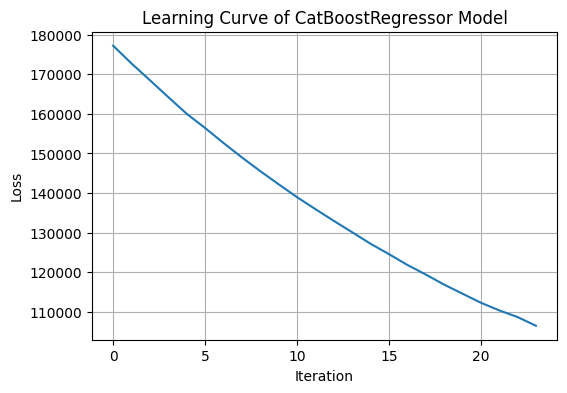

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'iterations' is a list of iteration numbers and 'loss' is the corresponding loss values
iterations = list(range(24))  # replace this with your iterations
loss = [177224.9465556, 172728.7888247, 168502.3911324, 164239.6742164, 160029.8813525, 156447.3380951,
        152660.4454646, 149023.0260441, 145550.9793914, 142229.9274781, 138976.5144144, 135946.4107447,
        132987.1487859, 130114.9475597, 127197.8765384, 124587.0429083, 121861.5605162, 119433.7228037,
        116888.8251541, 114586.8674232, 112303.0569585, 110370.1574856, 108674.1304029, 106482.2246383]  # replace this with your loss values

# Create a DataFrame
df = pd.DataFrame({'Iteration': iterations, 'Loss': loss})

# Plot the data
plt.figure(figsize=(6, 4))
plt.plot(df['Iteration'], df['Loss'])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve of CatBoostRegressor Model')
plt.grid(True)
plt.show()


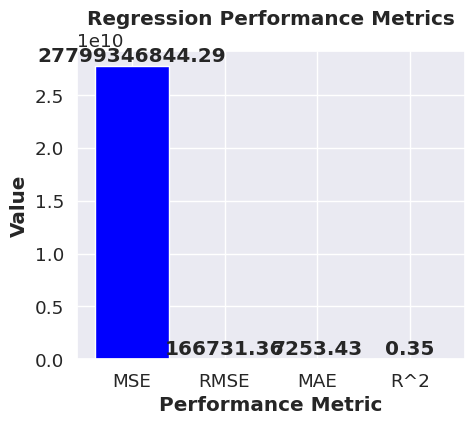

In [ ]:
import matplotlib.pyplot as plt

# Define the regression performance metrics and their values
metrics = ['MSE', 'RMSE', 'MAE', 'R^2']
values = [27799346844.29335, 166731.36131002274, 7253.429025982816, 0.35485756424022896]

# Create a color palette for the bars
colors = ['blue', 'green', 'orange', 'red']

# Create the bar plot
plt.figure(figsize=(5, 4))
plt.bar(metrics, values, color=colors)

# Add text labels for each bar
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.xlabel('Performance Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Regression Performance Metrics', fontweight='bold')

# Show the plot
plt.show()


<h3>Evaluate Model Performance</h3>

In [ ]:

print(df.shape)

(6648, 493)


# Tuning the Catboost model and find out the Hyperparameter

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the hyperparameter grid for tuning
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [3, 4, 5]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(CatBoostRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and create the best model
best_params = grid_search.best_params_
best_model = CatBoostRegressor(**best_params)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate the performance of the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best parameters, best score, and evaluation metrics
best_score = np.sqrt(-grid_search.best_score_)
print("Best hyperparameters:", best_params)
print("Best score:", best_score)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)



Streaming output truncated to the last 5000 lines.
105:	learn: 22538.6288633	total: 164ms	remaining: 301ms
106:	learn: 22339.7909832	total: 166ms	remaining: 299ms
107:	learn: 22064.8712368	total: 167ms	remaining: 297ms
108:	learn: 21849.6682722	total: 168ms	remaining: 295ms
109:	learn: 21655.5826236	total: 170ms	remaining: 293ms
110:	learn: 21429.6032284	total: 171ms	remaining: 292ms
111:	learn: 21219.3912078	total: 173ms	remaining: 290ms
112:	learn: 21008.5764949	total: 174ms	remaining: 288ms
113:	learn: 20828.9854523	total: 176ms	remaining: 286ms
114:	learn: 20656.1081637	total: 177ms	remaining: 285ms
115:	learn: 20490.1522576	total: 178ms	remaining: 283ms
116:	learn: 20331.5130545	total: 180ms	remaining: 281ms
117:	learn: 20178.3351693	total: 181ms	remaining: 279ms
118:	learn: 19770.1301683	total: 183ms	remaining: 278ms
119:	learn: 19621.8495364	total: 184ms	remaining: 276ms
120:	learn: 19471.2133209	total: 185ms	remaining: 274ms
121:	learn: 19335.2943864	total: 187ms	remaining: 272

One way to look at the fit of the model is by looking at the <b>Actual vs Predicted barplot</b>: We can look at the accurracy of the forecasted values that result from the model and compare it to the actual values.</p>

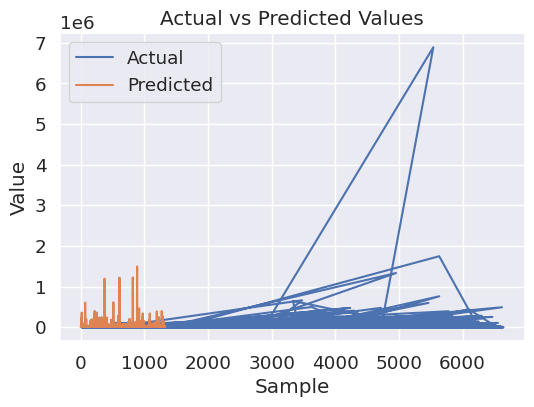

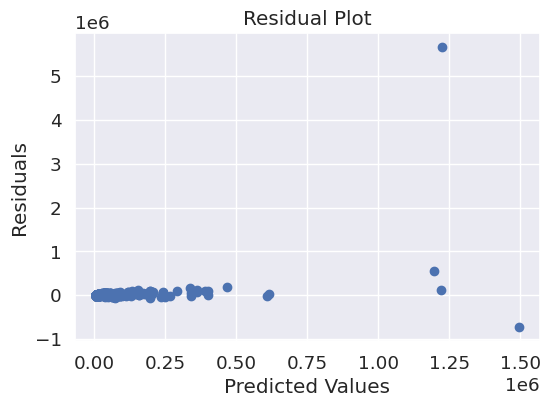

In [ ]:
# Visualize the results
plt.figure(figsize=(6, 4))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Actual vs Predicted Values: This line plot shows the comparison between the actual values (y_test) and the predicted values (y_pred) on the y-axis. Each data point represents a sample from the test set. This plot allows you to visually assess how well the model predictions align with the actual values. If the predicted values closely follow the trend of the actual values, it indicates a good fit of the model.

Residual Plot: This scatter plot shows the residuals (difference between actual and predicted values) on the y-axis against the predicted values on the x-axis. The residuals represent the errors or discrepancies between the model's predictions and the actual values. The plot helps you examine the distribution of residuals and identify any patterns or trends. Ideally, the residuals should be randomly scattered around the horizontal line at 0, indicating that the model's predictions are unbiased.

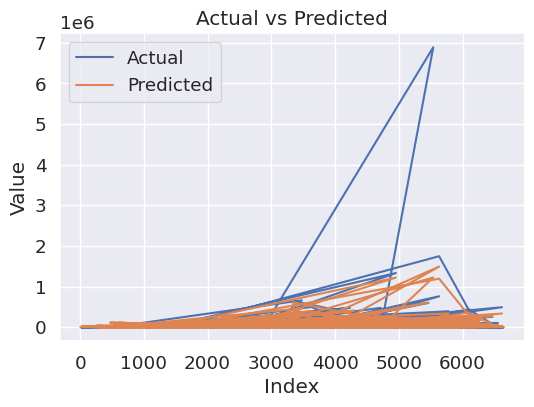

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with 'Actual' and 'Predicted' columns
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Reset the index for plotting
df_check = df_check.reset_index()

# Plot the 'Actual' and 'Predicted' values
plt.figure(figsize=(6, 4))
plt.plot(df_check['index'], df_check['Actual'], label='Actual')
plt.plot(df_check['index'], df_check['Predicted'], label='Predicted')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# create a date range that matches the length of 'df'
dates = pd.date_range(start='1/1/2020', periods=6648)

# generate random values for each column, this needs to be suitable for each column
ad_revenue = np.random.randint(1000, 5000, size=6648)
sponsorship_revenue = np.random.randint(1000, 5000, size=6648)
streaming_revenue = np.random.randint(1000, 5000, size=6648)
prize_pool = np.random.randint(1000, 5000, size=6648)
merch_sales = np.random.randint(1000, 5000, size=6648)
viewership = np.random.randint(1000, 5000, size=6648)
social_media_engagement = np.random.randint(1000, 5000, size=6648)
player_salaries = np.random.randint(1000, 5000, size=6648)
team_performance = np.random.normal(loc=0, scale=1, size=6648)
game_popularity = np.random.randint(1, 10, size=6648)
esports_ecosystem = np.random.choice(['Mature', 'Growing', 'Emerging'], size=6648)

# create the new DataFrame
New_df = pd.DataFrame({
    'Date': dates,
    'Advertising Revenue': ad_revenue,
    'Sponsorship Revenue': sponsorship_revenue,
    'Streaming Revenue': streaming_revenue,
    'Prize Pool': prize_pool,
    'Merchandise Sales': merch_sales,
    'Viewership': viewership,
    'Social Media Engagement': social_media_engagement,
    'Player Salaries': player_salaries,
    'Team Performance': team_performance,
    'Game Popularity': game_popularity,
    'Esports Ecosystem': esports_ecosystem
})


In [ ]:
print(New_df.columns)


Index(['Date', 'Advertising Revenue', 'Sponsorship Revenue',
       'Streaming Revenue', 'Prize Pool', 'Merchandise Sales', 'Viewership',
       'Social Media Engagement', 'Player Salaries', 'Team Performance',
       'Game Popularity', 'Esports Ecosystem'],
      dtype='object')


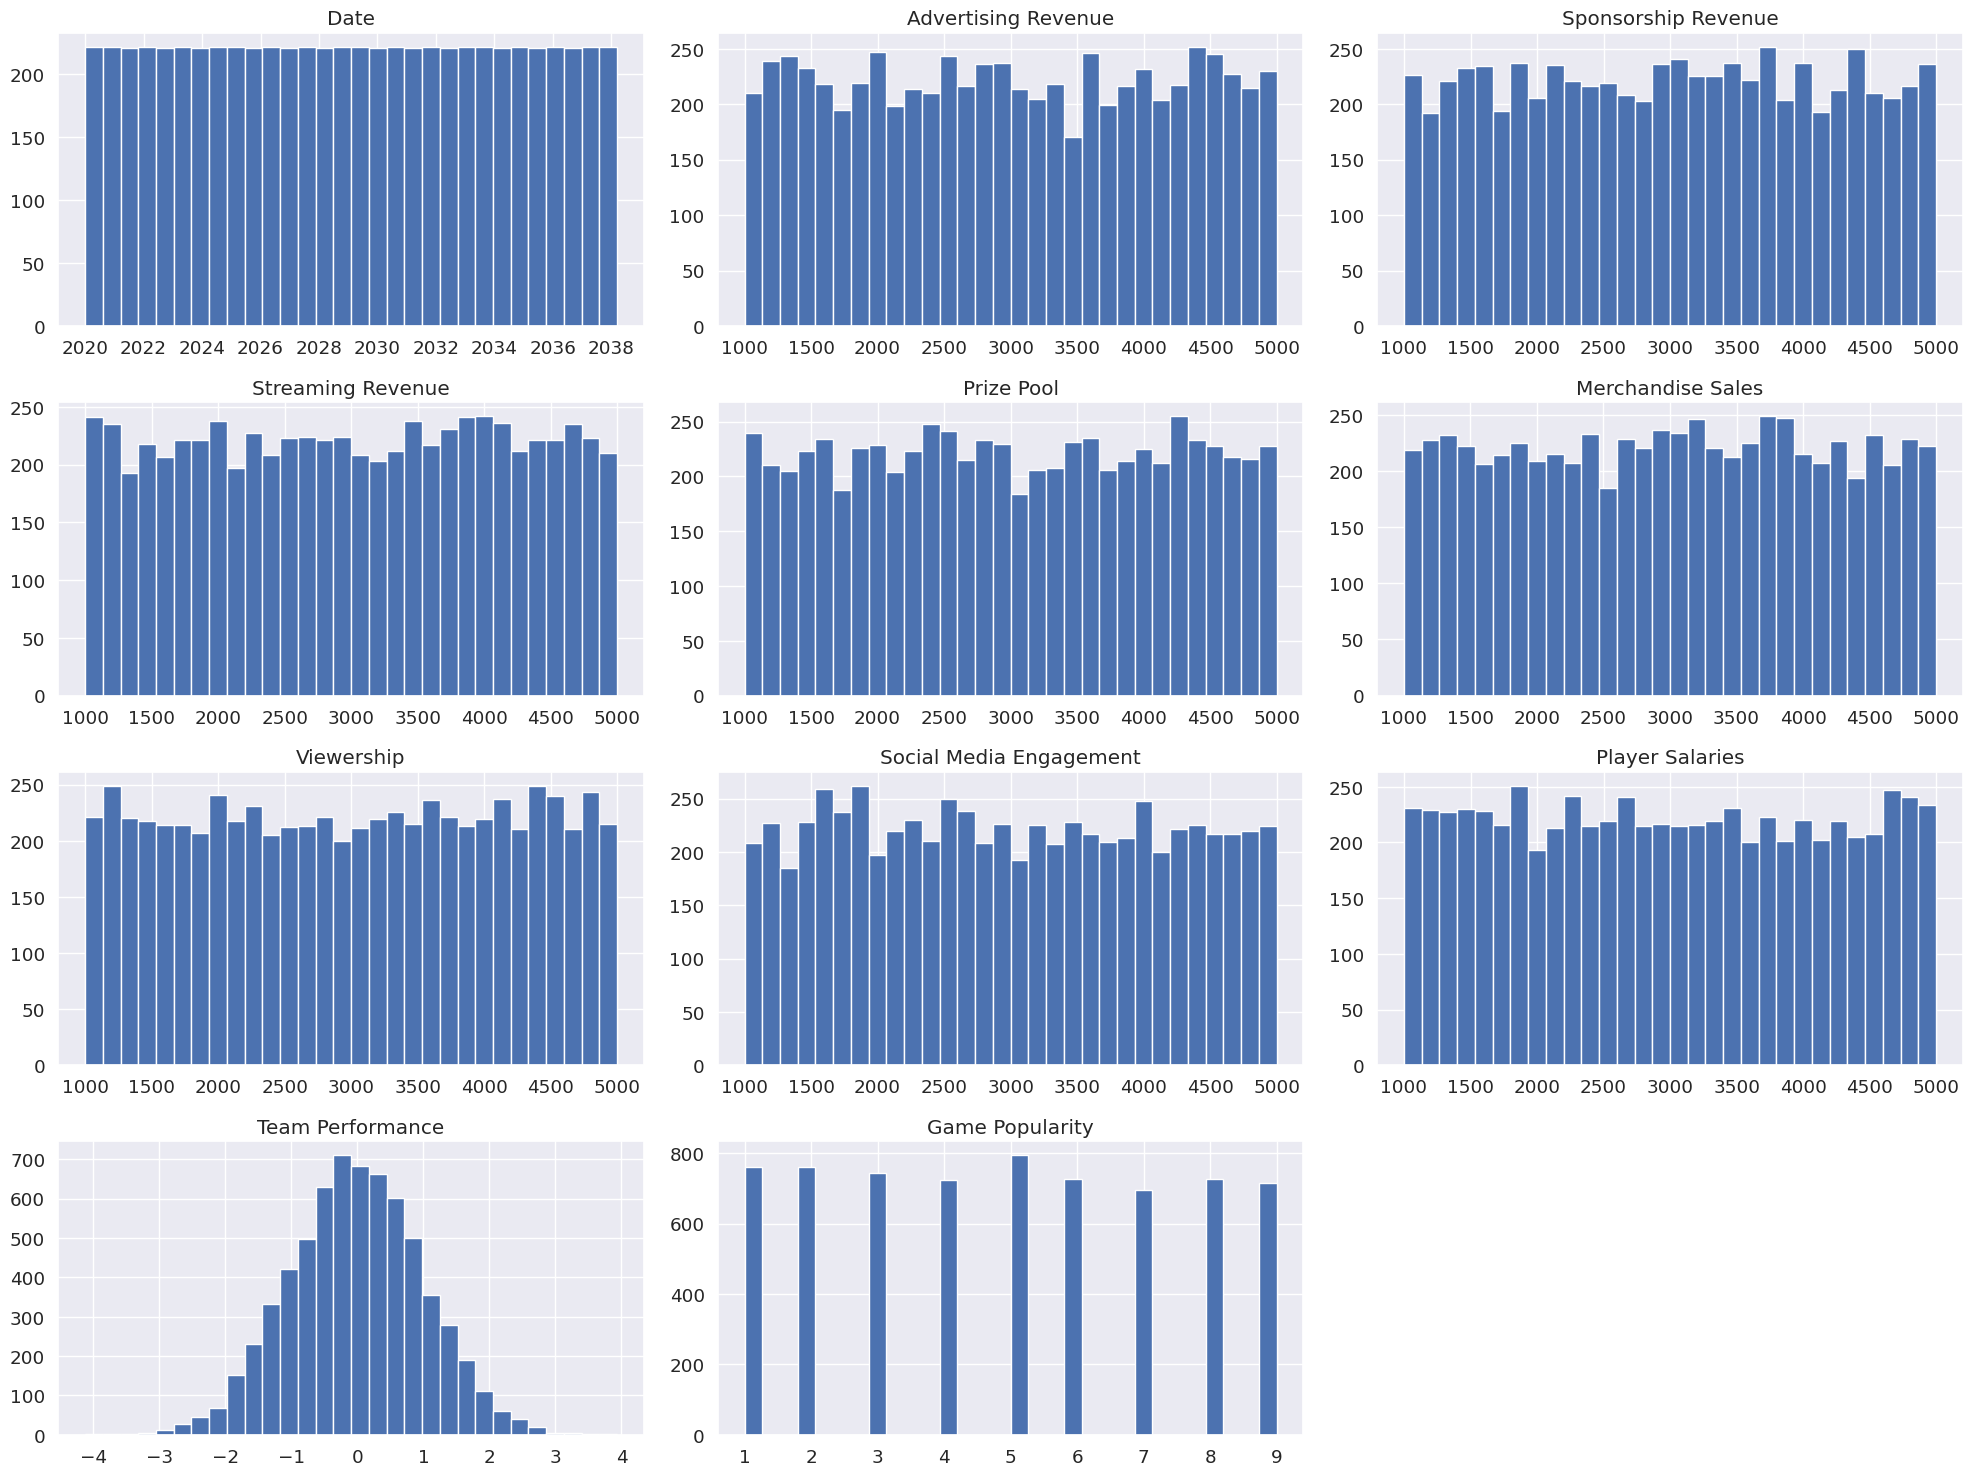

In [ ]:
import matplotlib.pyplot as plt

# Generate histograms for all columns
New_df.hist(bins=30, figsize=(20,15))
plt.tight_layout()  # This ensures that the subplots do not overlap
plt.show()


In [ ]:
print(New_df['Esports Ecosystem'].dtype)


object


# Histogram for Esports Ecosystme

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

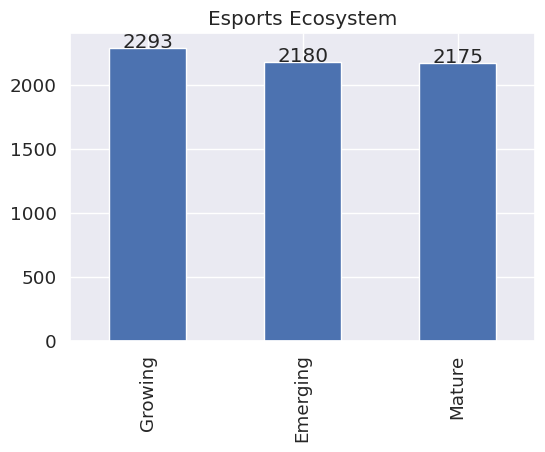

In [ ]:
# Create the bar plot
ax = New_df['Esports Ecosystem'].value_counts().plot(kind='bar', figsize=(6,4))

# Add the title
plt.title('Esports Ecosystem')

# Get the current figure for further manipulation
fig = plt.gcf()

# Loop over each bar and place a label with the height (value)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+0.1,
            s = '{:.0f}'.format(height),
            ha = 'center')
plt.show()


In [ ]:
# Assuming df and new_df are your dataframes
combined_df = pd.concat([df, New_df], axis=0, ignore_index=True)

# Display the columns of the combined dataframe
print(combined_df.columns)


Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Sponsorship Revenue', 'Streaming Revenue', 'Prize Pool',
       'Merchandise Sales', 'Viewership', 'Social Media Engagement',
       'Player Salaries', 'Team Performance', 'Game Popularity',
       'Esports Ecosystem'],
      dtype='object', length=505)


In [ ]:
combined_df.shape

(13296, 505)

In [ ]:
df.shape

(6648, 493)

In [ ]:
New_df.shape

(6648, 12)

In [ ]:
df.columns

Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Zula', 'Zwift', 'chess24', 'iRacing.com', 'osu!', 'rFactor',
       'rFactor 2', 'Year', 'Month', 'Day'],
      dtype='object', length=493)

In [ ]:
New_df.columns

Index(['Date', 'Advertising Revenue', 'Sponsorship Revenue',
       'Streaming Revenue', 'Prize Pool', 'Merchandise Sales', 'Viewership',
       'Social Media Engagement', 'Player Salaries', 'Team Performance',
       'Game Popularity', 'Esports Ecosystem'],
      dtype='object')

In [ ]:
combined_df.columns

Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Sponsorship Revenue', 'Streaming Revenue', 'Prize Pool',
       'Merchandise Sales', 'Viewership', 'Social Media Engagement',
       'Player Salaries', 'Team Performance', 'Game Popularity',
       'Esports Ecosystem'],
      dtype='object', length=505)

In [ ]:
# Convert 'Year', 'Month', and 'Day' columns to string
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Day'] = df['Day'].astype(str)

# Add leading zeroes to 'Month' and 'Day' columns
df['Month'] = df['Month'].str.zfill(2)
df['Day'] = df['Day'].str.zfill(2)

# Combine 'Year', 'Month', and 'Day' to create a 'Date' column
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

# Now, you can merge 'df' and 'new_df' on 'Date'
combined_df = pd.merge(df, New_df, on='Date')

# Check the shape of the combined dataframe
print(combined_df.shape)


(761, 505)


In [ ]:
# Outer join df and new_df
combined_df = pd.merge(df, New_df, how='outer', on='Date')

# Check the shape of the combined dataframe
print(combined_df.shape)


(13281, 505)


In [ ]:
# Replace NaN values with 0
combined_df = combined_df.fillna(0)

# Check the shape of the combined dataframe
print(combined_df.shape)


(13281, 505)


In [ ]:
combined_df.columns


Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Sponsorship Revenue', 'Streaming Revenue', 'Prize Pool',
       'Merchandise Sales', 'Viewership', 'Social Media Engagement',
       'Player Salaries', 'Team Performance', 'Game Popularity',
       'Esports Ecosystem'],
      dtype='object', length=505)

In [ ]:
print(combined_df.dtypes)


Earnings                   float64
Players                    float64
Tournaments                float64
Merchandise Profit         float64
ARMS                       float64
                            ...   
Social Media Engagement    float64
Player Salaries            float64
Team Performance           float64
Game Popularity            float64
Esports Ecosystem           object
Length: 505, dtype: object


In [ ]:
# Convert the 'Esports Ecosystem' column to numeric, and coerce errors to NaN
combined_df['Esports Ecosystem'] = pd.to_numeric(combined_df['Esports Ecosystem'], errors='coerce')


In [ ]:
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Day'] = combined_df['Date'].dt.day


In [ ]:
combined_df = combined_df.drop('Date', axis=1)


# Feature Selection using Lasso

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

# Assuming you have already loaded the 'combined_df' DataFrame

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_combined_df = pd.DataFrame(imputer.fit_transform(combined_df), columns=combined_df.columns)

# Perform Lasso feature selection
X = imputed_combined_df.drop('Merchandise Sales', axis=1)
y = imputed_combined_df['Merchandise Sales']

lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value as needed
lasso_model.fit(X, y)

# Get the selected features
selected_features = X.columns[lasso_model.coef_ != 0]
selected_combined_df = imputed_combined_df[['Merchandise Sales'] + list(selected_features)]

print("Selected features:")
print(selected_features)


Selected features:
Index(['Earnings', 'Players', 'Tournaments', 'Merchandise Profit', 'ARMS',
       'Acceleration of SUGURI 2', 'Age of Empires', 'Age of Empires II',
       'Age of Empires III', 'Age of Empires Online',
       ...
       'Day', 'Advertising Revenue', 'Sponsorship Revenue',
       'Streaming Revenue', 'Prize Pool', 'Viewership',
       'Social Media Engagement', 'Player Salaries', 'Team Performance',
       'Game Popularity'],
      dtype='object', length=491)


# Train and Evaluate the HistGradientBoostingRegressor model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Assuming you have already loaded the 'selected_combined_df' DataFrame with the selected features

# Split the data into training and testing sets
X = selected_combined_df.drop('Merchandise Sales', axis=1)
y = selected_combined_df['Merchandise Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputer and HistGradientBoostingRegressor
pipeline = make_pipeline(SimpleImputer(strategy='mean'), HistGradientBoostingRegressor())

# Train the HistGradientBoostingRegressor model
pipeline.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Mean Squared Error (MSE):", train_mse)
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Training Set R-Squared (R2):", train_r2)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Set Mean Squared Error (MSE):", test_mse)
print("Test Set Mean Absolute Error (MAE):", test_mae)
print("Test Set R-Squared (R2):", test_r2)


Training Set Mean Squared Error (MSE): 501935.9662931864
Training Set Mean Absolute Error (MAE): 439.52824524201606
Training Set R-Squared (R2): 0.830675507755325
Test Set Mean Squared Error (MSE): 656223.6648668776
Test Set Mean Absolute Error (MAE): 502.2775886258586
Test Set R-Squared (R2): 0.7762115952956333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

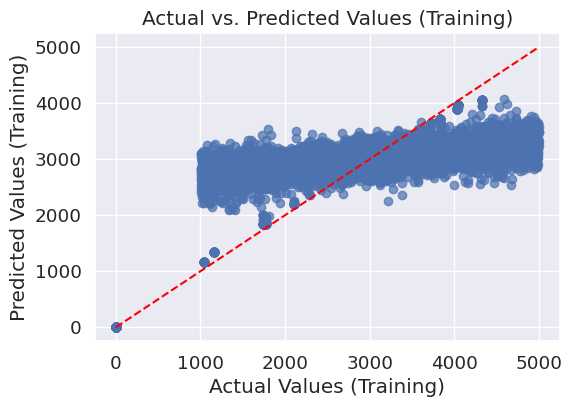

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

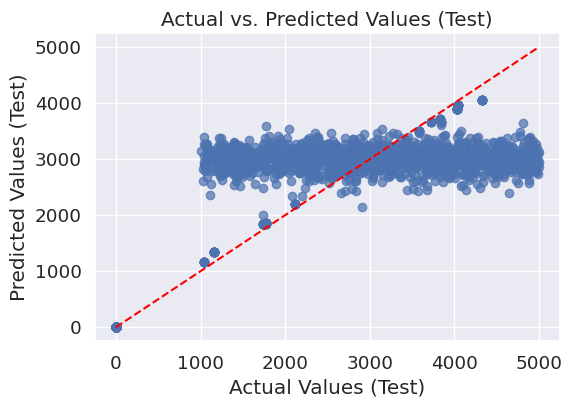

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

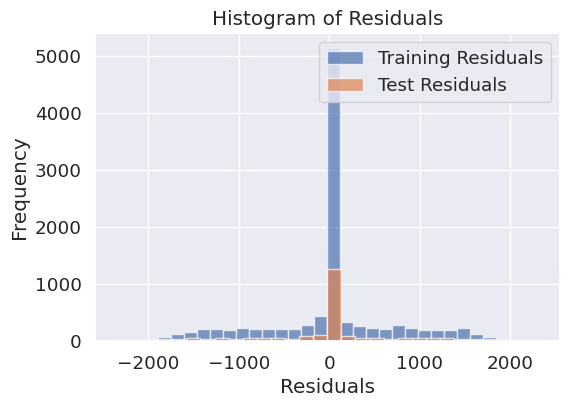

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for training set
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Actual vs. Predicted Values (Training)")
plt.savefig('Actual vs. Predicted Values (Training).png')
files.download('Actual vs. Predicted Values (Training).png')
plt.show()

# Scatter plot for test set
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Actual vs. Predicted Values (Test)")
plt.savefig('Actual vs. Predicted Values (Test).png')
files.download('Actual vs. Predicted Values (Test).png')
plt.show()

# Histogram of residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.hist(train_residuals, bins=30, alpha=0.7, label='Training Residuals')
plt.hist(test_residuals, bins=30, alpha=0.7, label='Test Residuals')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.savefig('Histogram of Residuals.png')
files.download('Histogram of Residuals.png')
plt.show()
